In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import sys
import os
import seaborn as sns 
import ipywidgets as widgets
from collections import Counter
plt.style.use('seaborn-v0_8-deep')
sys.version
pd.__version__
mpl.__version__
# mpl.style.available

'3.8.4'

In [11]:
data = pd.read_csv("movies_metadata.csv")
data

C:\Users\lukas\AppData\Local\Temp\ipykernel_18452\2978496086.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("movies_metadata.csv")


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [13]:
movies = data[["title", "release_date", "runtime", "budget", "revenue", "vote_average", "vote_count"]]
movies

,title,release_date,runtime,budget,revenue,vote_average,vote_count
0,Toy Story,1995-10-30,81.0,30000000,373554033.0,7.7,5415.0
1,Jumanji,1995-12-15,104.0,65000000,262797249.0,6.9,2413.0
2,Grumpier Old Men,1995-12-22,101.0,0,0.0,6.5,92.0
3,Waiting to Exhale,1995-12-22,127.0,16000000,81452156.0,6.1,34.0
4,Father of the Bride Part II,1995-02-10,106.0,0,76578911.0,5.7,173.0
...,...,...,...,...,...,...,...
45461,Subdue,NaN,90.0,0,0.0,4.0,1.0
45462,Century of Birthing,2011-11-17,360.0,0,0.0,9.0,3.0
45463,Betrayal,2003-08-01,90.0,0,0.0,3.8,6.0
45464,Satan Triumphant,1917-10-21,87.0,0,0.0,0.0,0.0


In [14]:
movies.sort_values(by=["vote_average"], ascending=False)

,title,release_date,runtime,budget,revenue,vote_average,vote_count
21642,Ice Age Columbus: Who Were the First Americans?,2005-01-01,0.0,0,0.0,10.0,1.0
15710,If God Is Willing and da Creek Don't Rise,2010-08-23,255.0,0,0.0,10.0,1.0
22396,Meat the Truth,2008-10-03,74.0,0,0.0,10.0,1.0
22395,Marvin Hamlisch: What He Did For Love,2013-10-12,82.0,0,0.0,10.0,1.0
35343,Elaine Stritch: At Liberty,2002-01-01,140.0,300000,0.0,10.0,1.0
...,...,...,...,...,...,...,...
19730,NaN,1,NaN,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,NaN,NaN,NaN
29502,NaN,NaN,NaN,0,NaN,NaN,NaN
29503,NaN,12,NaN,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,NaN,NaN,NaN
35586,NaN,NaN,NaN,0,NaN,NaN,NaN


In [26]:
movie_ratings = pd.DataFrame(movies)
movie_ratings['Average Score'] = (movie_ratings['vote_count'] / (movie_ratings['vote_count']+25000)) * movie_ratings['vote_average'] + (25000/(movie_ratings['vote_count'] + 25000)) * 7
movie_ratings.sort_values(by=["Average Score"], ascending=False).head(100)

,title,release_date,runtime,budget,revenue,vote_average,vote_count,Average Score
12481,The Dark Knight,2008-07-16,152.0,185000000,1.004558e+09,8.3,12269.0,7.427962
15480,Inception,2010-07-14,148.0,160000000,8.255328e+08,8.1,14075.0,7.396225
314,The Shawshank Redemption,1994-09-23,142.0,25000000,2.834147e+07,8.5,8358.0,7.375832
2843,Fight Club,1999-10-15,139.0,63000000,1.008538e+08,8.3,9678.0,7.362806
22879,Interstellar,2014-11-05,169.0,165000000,6.751200e+08,8.1,11187.0,7.340059
...,...,...,...,...,...,...,...,...
4843,Amélie,2001-04-25,122.0,10000000,1.739220e+08,7.8,3403.0,7.095849
21948,Dallas Buyers Club,2013-09-07,117.0,5000000,5.519828e+07,7.9,2973.0,7.095653
1156,Raiders of the Lost Ark,1981-06-12,115.0,18000000,3.899260e+08,7.7,3949.0,7.095489
1159,"The Good, the Bad and the Ugly",1966-12-23,161.0,1200000,6.000000e+06,8.1,2371.0,7.095287


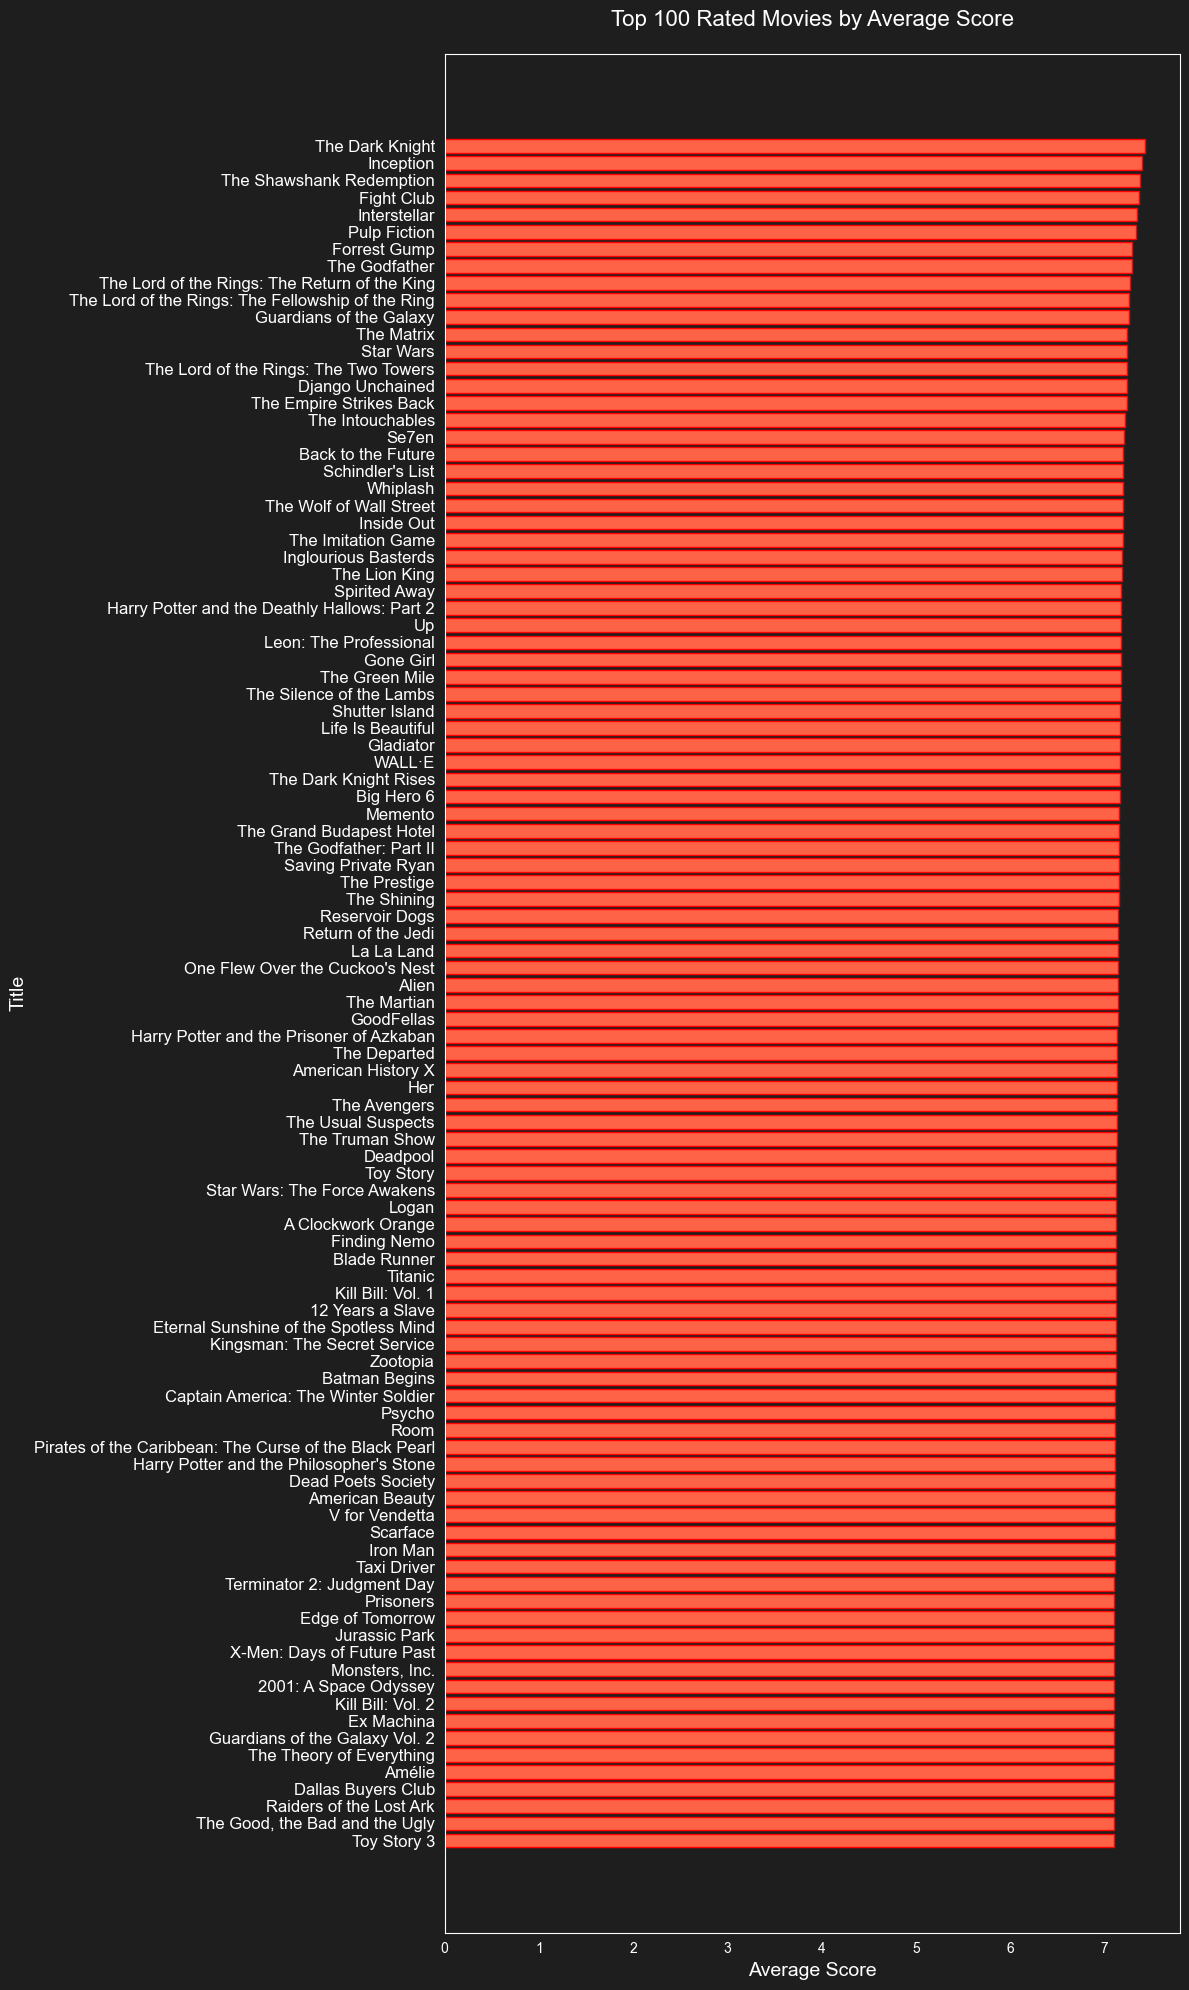

In [33]:
top_100_movies = movie_ratings.sort_values(by='Average Score', ascending=False).head(100)

top_100_movies.set_index('title', inplace=True)

# Set up the figure
plt.figure(figsize=(12, 20))
ax = plt.gca()

# Set the dark background
ax.set_facecolor('#1e1e1e')
plt.gcf().set_facecolor('#1e1e1e')

# Plot the data with a custom color and edgecolor for a glowing effect
bars = plt.barh(top_100_movies.index, top_100_movies['Average Score'], color='#FF6347', edgecolor='red', linewidth=1)

# Customize the appearance
plt.gca().invert_yaxis()  # Highest scores at the top
plt.title('Top 100 Rated Movies by Average Score', color='white', fontsize=16)
plt.xlabel('Average Score', color='white', fontsize=14)
plt.ylabel('Title', color='white', fontsize=14)
plt.xticks(color='white')
plt.yticks(color='white', fontsize=12)

# Remove grid lines
ax.grid(False)

# Enhance title and labels
title = plt.title('Top 100 Rated Movies by Average Score', color='white', fontsize=16, pad=20)
plt.xlabel('Average Score', color='white', fontsize=14)
plt.ylabel('Title', color='white', fontsize=14)

# Set tight layout
plt.tight_layout()

# Show the plot
plt.show()